<a href="https://colab.research.google.com/github/kkipngenokoech/Material-Science/blob/main/calculations/relax_doped_Graphene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# eliminate text output during installation
%%capture

# install mathematical libraries to peform fast Fourier transforms
# (the exclamation mark means that the command is run under Linux)
! apt-get install -y libfftw3-3 libfftw3-dev libfftw3-doc

In [3]:

# eliminate text output during installation
%%capture

# install the Atomic simulation environment
# ! apt install ase
! pip install git+https://gitlab.com/ase/ase

## Loading Libraries

In [4]:
import ase.io
import matplotlib.pyplot as plt
import numpy as np
import re

In [5]:
# eliminate text output during installation
%%capture

# navigate to main directory named '/content/'
%cd /content/

# download the pre-compiled files in compressed format (under Linux)
#! wget 'https://docs.google.com/uc?export=download&id=1kw_CJMjP6ggDZXDNp5phAqCPpoe2WXCA' -O qe-lite.tgz
!gdown 'https://drive.google.com/uc?export=download&id=13l-Kiyg-F6aYb5lF8M3RsE1hSnLRdGna' -O qe-lite.tgz

# unpack the compressed files (under Linux)
! tar -xvzf qe-lite.tgz

# clean up some files
! rm -rf sample_data qe-lite.tgz

In [6]:
!ls

qe-lite


In [7]:
%cd /content/qe-lite/pseudopotentials/
!wget 'http://pseudopotentials.quantum-espresso.org/upf_files/C.pbe-n-kjpaw_psl.1.0.0.UPF'
!wget 'https://pseudopotentials.quantum-espresso.org/upf_files/N.pbe-n-kjpaw_psl.1.0.0.UPF'
!mv C.pbe-n-kjpaw_psl.1.0.0.UPF C.upf
!mv N.pbe-n-kjpaw_psl.1.0.0.UPF N.upf
!ls

/content/qe-lite/pseudopotentials
--2025-08-07 12:04:38--  http://pseudopotentials.quantum-espresso.org/upf_files/C.pbe-n-kjpaw_psl.1.0.0.UPF
Resolving pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)... 51.77.118.191
Connecting to pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)|51.77.118.191|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 858332 (838K)
Saving to: ‘C.pbe-n-kjpaw_psl.1.0.0.UPF’

C.pbe-n-kjpaw_psl.1 100%[===================>] 838.21K   689KB/s    in 1.2s    

2025-08-07 12:04:40 (689 KB/s) - ‘C.pbe-n-kjpaw_psl.1.0.0.UPF’ saved [858332/858332]

--2025-08-07 12:04:40--  https://pseudopotentials.quantum-espresso.org/upf_files/N.pbe-n-kjpaw_psl.1.0.0.UPF
Resolving pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)... 51.77.118.191
Connecting to pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)|51.77.118.191|:443... connected.
HTTP request

## RELAX CALCULATIONS TO UPDATE ATOMIC POSITIONS

In [29]:
# create calculation folder and navigate into it
%mkdir -p /content/graphene
%cd /content/graphene/

# create input and write it into the file graphene.scf.in
# (documentation can be found at https://www.quantum-espresso.org/Doc/INPUT_PW.html)

# cut-off and total enegry [10 - 100] with a step of five, a plot of cut-off and total enegry,
# k point increase from 1 - 10
# cell dimension along the z axis, 1 - 10 , ensure convergence
# nitride of graphene  = 18 atoms

qe_input = """
&CONTROL
  calculation = 'relax'
  restart_mode = 'from_scratch'
  pseudo_dir= '/content/qe-lite/pseudopotentials'
  prefix = 'graphene'
/
&SYSTEM
  ibrav = 4
  nat = 8
  ntyp = 2
  A = 4.92
  C = 5
  occupations = 'smearing'
  smearing = 'mv'
  degauss = 0.02
  ecutwfc = 50
/
&ELECTRONS
  mixing_beta = 0.3
  conv_thr = 1.0d-8
/
&IONS
/

ATOMIC_SPECIES
C 12.01017 C.upf
N 14.00670 N.upf

ATOMIC_POSITIONS (crystal)
C 0.00000  0.00000  0.0
C 0.16667  0.33333  0.0
C 0.00000  0.50000  0.0
N 0.16667  0.83333  0.0
C 0.50000  0.50000  0.0
C 0.66667  0.83333  0.0
C 0.50000  0.00000  0.0
C 0.66667  0.33333  0.0

K_POINTS automatic
10 10 1 0 0 0
"""


with open("doped_graphene.scf.in", "w") as f:
    f.write(qe_input)

# print the content of the input file (under Linux)
! cat doped_graphene.scf.in

/content/graphene

&CONTROL
  calculation = 'relax'
  restart_mode = 'from_scratch'
  pseudo_dir= '/content/qe-lite/pseudopotentials'
  prefix = 'graphene'
/
&SYSTEM
  ibrav = 4
  nat = 8
  ntyp = 2
  A = 4.92
  C = 5
  occupations = 'smearing'
  smearing = 'mv'
  degauss = 0.02
  ecutwfc = 50
/
&ELECTRONS
  mixing_beta = 0.3
  conv_thr = 1.0d-8
/
&IONS
/

ATOMIC_SPECIES
C 12.01017 C.upf
N 14.00670 N.upf

ATOMIC_POSITIONS (crystal)
C 0.00000  0.00000  0.0
C 0.16667  0.33333  0.0
C 0.00000  0.50000  0.0
N 0.16667  0.83333  0.0
C 0.50000  0.50000  0.0
C 0.66667  0.83333  0.0
C 0.50000  0.00000  0.0
C 0.66667  0.33333  0.0

K_POINTS automatic
10 10 1 0 0 0


In [15]:
# run the pw.x executable using si.scf.in to create si.scf.out
! /content/qe-lite/bin/pw.x < doped_graphene.scf.in > graphene.scf.out

# print the content of the output file (under Linux)
! cat graphene.scf.out


     Program PWSCF v.7.4 starts on  7Aug2025 at 12:23:39 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
         "P. Giannozzi et al., J. Chem. Phys. 152 154105 (2020);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Serial version
     8066 MiB available memory on the printing compute node when the environment starts

     Waiting for input...
     Reading input from standard input

     Current dimensions of program PWSCF are:
     Max number of different atomic species (ntypx) = 10
     Max number of k-points (npk) =  40000
     Max angular momentum in pseudopotentials (lmaxx) =  4
     file C.upf: wavefunction(s)  2S 2P renormalized
 

In [17]:

! grep -e "total energy  " -e "estimated" graphene.scf.out

     total energy              =    -157.28404984 Ry
     estimated scf accuracy    <       0.73826608 Ry
     total energy              =    -157.18160097 Ry
     estimated scf accuracy    <       0.24671110 Ry
     total energy              =    -157.21052709 Ry
     estimated scf accuracy    <       0.01035027 Ry
     total energy              =    -157.21193733 Ry
     estimated scf accuracy    <       0.00218022 Ry
     total energy              =    -157.21212977 Ry
     estimated scf accuracy    <       0.00027436 Ry
     total energy              =    -157.21212344 Ry
     estimated scf accuracy    <       0.00007862 Ry
     total energy              =    -157.21214527 Ry
     estimated scf accuracy    <       0.00001929 Ry
     total energy              =    -157.21214723 Ry
     estimated scf accuracy    <       0.00000123 Ry
     total energy              =    -157.21214774 Ry
     estimated scf accuracy    <       0.00000220 Ry
     total energy              =    -157.21214

In [16]:
!grep -A 100 "ATOMIC_POSITIONS" relax.out

ATOMIC_POSITIONS (crystal)
N                0.0000020411       -0.0000020411        0.0000000000
C                0.1670986493        0.3341964055        0.0000000000
C               -0.0015315617        0.4992296933       -0.0000000000
C                0.1670996394        0.8329003606        0.0000000000
C                0.5007698343        0.4992301657        0.0000000000
C                0.6658035945        0.8329013507       -0.0000000000
C                0.5007703067        0.0015315617        0.0000000000
C                0.6666674964        0.3333325036        0.0000000000



     Writing config-only to output data dir ./graphene.save/ :
     XML data file
     NEW-OLD atomic charge density approx. for the potential

     Check: negative core charge=   -0.000052

     negative rho (up, down):  7.344E-07 0.000E+00

     total cpu time spent up to now is       90.7 secs

     Self-consistent Calculation

     iteration #  1     ecut=    50.00 Ry     beta= 0.30
     Davidson diagon

### OPTIMIZED ATOMIC POSITIONS

In [18]:
def update_atomic_positions(out_file="relax.out", in_file="graphene.scf.in", out_in_file="updated.scf.in"):
    with open(out_file) as f: txt = f.read()
    final_block = re.findall(r"Begin final coordinates.+?ATOMIC_POSITIONS.+?\n((?:\s*\w+\s+[-\d\.Ee+]+\s+[-\d\.Ee+]+\s+[-\d\.Ee+]+\n)+)", txt, re.DOTALL)[-1]
    with open(in_file) as f: in_txt = f.read()
    updated = re.sub(r"ATOMIC_POSITIONS[^\n]*\n(?:\s*\w+\s+[-\d\.Ee+]+\s+[-\d\.Ee+]+\s+[-\d\.Ee+]+\n)+", f"ATOMIC_POSITIONS angstrom\n{final_block}", in_txt)
    with open(out_in_file, "w") as f: f.write(updated)


In [19]:
update_atomic_positions("graphene.scf.out", "doped_graphene.scf.in", "doped_graphene.updated.scf.in")

In [20]:
!cat doped_graphene.updated.scf.in


&CONTROL
  calculation = 'relax'
  restart_mode = 'from_scratch'
  pseudo_dir= '/content/qe-lite/pseudopotentials'
  prefix = 'graphene'
/
&SYSTEM
  ibrav = 4
  nat = 8
  ntyp = 2
  A = 4.92
  C = 5
  occupations = 'smearing'
  smearing = 'mv'
  degauss = 0.02
  ecutwfc = 50
/
&ELECTRONS
  mixing_beta = 0.3
  conv_thr = 1.0d-8
/
&IONS
/

ATOMIC_SPECIES
C 12.01017 C.upf
N 14.00670 N.upf

ATOMIC_POSITIONS angstrom
N                0.0000017856       -0.0000017856        0.0000000000
C                0.1669820534        0.3339586033        0.0000000000
C               -0.0009260819        0.4995345982       -0.0000000000
C                0.1669816976        0.8330183024        0.0000000000
C                0.5004654156        0.4995345844        0.0000000000
C                0.6660413967        0.8330179466       -0.0000000000
C                0.5004654018        0.0009260819        0.0000000000
C                0.6666683311        0.3333316689        0.0000000000

K_POINTS automatic
10 

## CHANGING THE CALCULATIONS TYPE

In [23]:
def change_calc(file, val):
    text = open(file).read()
    text = re.sub(r"(&CONTROL[\s\S]*?calculation\s*=\s*')[^']*(')", rf"\1{val}\2", text, flags=re.M)
    open(file, 'w').write(text)

In [25]:
change_calc('doped_graphene.updated.scf.in', 'scf')
!cat doped_graphene.updated.scf.in


&CONTROL
  calculation = 'scf'
  restart_mode = 'from_scratch'
  pseudo_dir= '/content/qe-lite/pseudopotentials'
  prefix = 'graphene'
/
&SYSTEM
  ibrav = 4
  nat = 8
  ntyp = 2
  A = 4.92
  C = 5
  occupations = 'smearing'
  smearing = 'mv'
  degauss = 0.02
  ecutwfc = 50
/
&ELECTRONS
  mixing_beta = 0.3
  conv_thr = 1.0d-8
/
&IONS
/

ATOMIC_SPECIES
C 12.01017 C.upf
N 14.00670 N.upf

ATOMIC_POSITIONS angstrom
N                0.0000017856       -0.0000017856        0.0000000000
C                0.1669820534        0.3339586033        0.0000000000
C               -0.0009260819        0.4995345982       -0.0000000000
C                0.1669816976        0.8330183024        0.0000000000
C                0.5004654156        0.4995345844        0.0000000000
C                0.6660413967        0.8330179466       -0.0000000000
C                0.5004654018        0.0009260819        0.0000000000
C                0.6666683311        0.3333316689        0.0000000000

K_POINTS automatic
10 10

In [26]:
# run the pw.x executable using si.scf.in to create si.scf.out
! /content/qe-lite/bin/pw.x < doped_graphene.scf.in > graphene.scf.out

# print the content of the output file (under Linux)
! cat graphene.scf.out


     Program PWSCF v.7.4 starts on  7Aug2025 at 12:43:56 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
         "P. Giannozzi et al., J. Chem. Phys. 152 154105 (2020);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Serial version
     7940 MiB available memory on the printing compute node when the environment starts

     Waiting for input...
     Reading input from standard input

     Current dimensions of program PWSCF are:
     Max number of different atomic species (ntypx) = 10
     Max number of k-points (npk) =  40000
     Max angular momentum in pseudopotentials (lmaxx) =  4
     file C.upf: wavefunction(s)  2S 2P renormalized
 

In [27]:
!grep -e "total energy  " -e "estimated" graphene.scf.out

     total energy              =    -157.28404984 Ry
     estimated scf accuracy    <       0.73826608 Ry
     total energy              =    -157.18160097 Ry
     estimated scf accuracy    <       0.24671110 Ry
     total energy              =    -157.21052709 Ry
     estimated scf accuracy    <       0.01035027 Ry
     total energy              =    -157.21193733 Ry
     estimated scf accuracy    <       0.00218022 Ry
     total energy              =    -157.21212977 Ry
     estimated scf accuracy    <       0.00027436 Ry
     total energy              =    -157.21212344 Ry
     estimated scf accuracy    <       0.00007862 Ry
     total energy              =    -157.21214527 Ry
     estimated scf accuracy    <       0.00001929 Ry
     total energy              =    -157.21214723 Ry
     estimated scf accuracy    <       0.00000123 Ry
     total energy              =    -157.21214774 Ry
     estimated scf accuracy    <       0.00000220 Ry
     total energy              =    -157.21214

In [28]:
output  = ase.io.read("graphene.scf.out")
output.get_total_energy()

-2138.9826570920786

## CONVERGENCE TEST W.R.T TO PLANE WAVE FUNCTION ECUTOFF ENERGY

In [ ]:
!cat doped_graphene.scf.in


&CONTROL
  calculation = 'scf'
  restart_mode = 'from_scratch'
  pseudo_dir= '/content/qe-lite/pseudopotentials'
  prefix = 'graphene'
/
&SYSTEM
  ibrav = 0
  nat = 8
  ntyp = 2
  occupations = 'smearing'
  smearing = 'mv'
  degauss = 0.02
  ecutwfc = 50
/
&ELECTRONS
  mixing_beta = 0.3
  conv_thr = 1.0d-8
/
ATOMIC_SPECIES
C 12.01017 C.upf
N 14.00670 N.upf

ATOMIC_POSITIONS (crystal)
N 0.00000  0.00000  0.0
C 0.33333  0.66667  0.0
C 0.50000  0.00000  0.0
C 0.83333  0.66667  0.0
C 0.00000  0.50000  0.0
C 0.33333  0.16667  0.0
C 0.50000  0.50000  0.0
C 0.83333  0.16667  0.0


CELL_PARAMETERS angstrom
  4.920   0.000   0.000
 -2.460   4.260   0.000
  0.000   0.000  15.000

K_POINTS (automatic)
10 10 1 0 0 0


In [ ]:
!grep -e "ecutwfc" doped_graphene.scf.in

  ecutwfc = 50


## Changing the value of ecutwfc

In [ ]:
def change_ecutwfc_param(new_cutwfc):
  global qe_input
  qe_input = re.sub(r"ecutwfc\s*=\s*\d+", f"ecutwfc = {new_cutwfc}", qe_input)
  with open("doped_graphene.scf.in", "w") as f:
    f.write(qe_input)

  grep_output = !grep -e "ecutwfc " doped_graphene.scf.in
  if grep_output:
      match = re.search(r"ecutwfc\s*=\s*(\d+)", grep_output[0])
      if match:
          ecutwfc_value = match.group(1)

  print(f"Running calculation with ecutwfc={ecutwfc_value}")



In [ ]:
change_ecutwfc_param(20)
!cat doped_graphene.scf.in

Running calculation with ecutwfc=20

&CONTROL
  calculation = 'scf'
  restart_mode = 'from_scratch'
  pseudo_dir= '/content/qe-lite/pseudopotentials'
  prefix = 'graphene'
/
&SYSTEM
  ibrav = 0
  nat = 8
  ntyp = 2
  occupations = 'smearing'
  smearing = 'mv'
  degauss = 0.02
  ecutwfc = 20
/
&ELECTRONS
  mixing_beta = 0.3
  conv_thr = 1.0d-8
/
ATOMIC_SPECIES
C 12.01017 C.upf
N 14.00670 N.upf

ATOMIC_POSITIONS (crystal)
N 0.00000  0.00000  0.0
C 0.33333  0.66667  0.0
C 0.50000  0.00000  0.0
C 0.83333  0.66667  0.0
C 0.00000  0.50000  0.0
C 0.33333  0.16667  0.0
C 0.50000  0.50000  0.0
C 0.83333  0.16667  0.0


CELL_PARAMETERS angstrom
  4.920   0.000   0.000
 -2.460   4.260   0.000
  0.000   0.000  15.000

K_POINTS (automatic)
10 10 1 0 0 0


### PLOTTING A GRAPH OF TOTAL ENERGY AGAINST CUTOFF

Running calculation with ecutwfc=10
Successfully read energy: -2076.270283993685
Running calculation with ecutwfc=20
Successfully read energy: -2132.9622381415443
Running calculation with ecutwfc=30
Successfully read energy: -2138.723645942925
Running calculation with ecutwfc=40
Successfully read energy: -2139.3349690015475
Running calculation with ecutwfc=50
Successfully read energy: -2139.3974417129675
Running calculation with ecutwfc=60
Successfully read energy: -2139.4055336982447
Running calculation with ecutwfc=70
Successfully read energy: -2139.423582056764
Running calculation with ecutwfc=80
Successfully read energy: -2139.4332131179126
Running calculation with ecutwfc=90
Successfully read energy: -2139.4351441737685
Running calculation with ecutwfc=100
Successfully read energy: -2139.4358292203574
Running calculation with ecutwfc=110
Successfully read energy: -2139.4365134506047
Running calculation with ecutwfc=120
Successfully read energy: -2139.437813746583


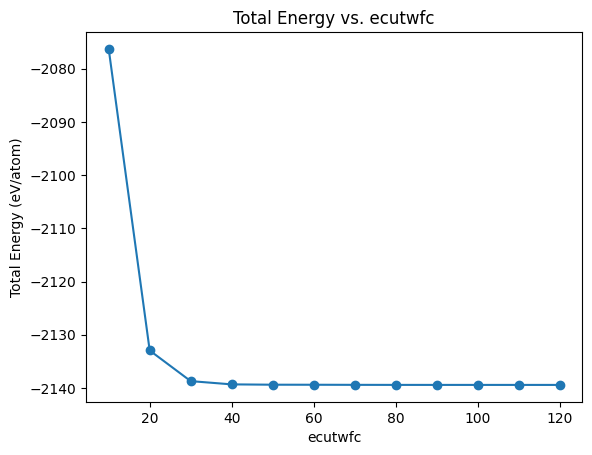

In [ ]:
ecutwfc_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
ecutoff_total_energies = []

for ecutwfc in ecutwfc_values:
  change_ecutwfc_param(ecutwfc)
  ! /content/qe-lite/bin/pw.x < doped_graphene.scf.in > graphene.scf.out
  output = ase.io.read("graphene.scf.out")
  # ! grep -e "total energy  " -e "estimated" graphene.scf.out
  ecutoff_total_energies.append(output.get_total_energy())
  print(f"Successfully read energy: {output.get_total_energy()}")


plt.plot(ecutwfc_values, ecutoff_total_energies, 'o-')
plt.xlabel('ecutwfc')
plt.ylabel('Total Energy (eV/atom)')
plt.title('Total Energy vs. ecutwfc')
plt.show()


## CONVERGENCE OF K-POINT SAMPLING WITH TOTAL ENERGY

In [ ]:
!cat doped_graphene.scf.in


&CONTROL
  calculation = 'scf'
  restart_mode = 'from_scratch'
  pseudo_dir= '/content/qe-lite/pseudopotentials'
  prefix = 'graphene'
/
&SYSTEM
  ibrav = 0
  nat = 8
  ntyp = 2
  occupations = 'smearing'
  smearing = 'mv'
  degauss = 0.02
  ecutwfc = 120
/
&ELECTRONS
  mixing_beta = 0.3
  conv_thr = 1.0d-8
/
ATOMIC_SPECIES
C 12.01017 C.upf
N 14.00670 N.upf

ATOMIC_POSITIONS (crystal)
N 0.00000  0.00000  0.0
C 0.33333  0.66667  0.0
C 0.50000  0.00000  0.0
C 0.83333  0.66667  0.0
C 0.00000  0.50000  0.0
C 0.33333  0.16667  0.0
C 0.50000  0.50000  0.0
C 0.83333  0.16667  0.0


CELL_PARAMETERS angstrom
  4.920   0.000   0.000
 -2.460   4.260   0.000
  0.000   0.000  15.000

K_POINTS (automatic)
10 10 1 0 0 0


### changing the k point sampling

In [ ]:
k_point_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,13, 14, 15, 16, 17, 18, 19, 20]
k_point_total_energies = []
def change_k_point_param(new_k_point):
  global qe_input
  qe_input = re.sub(r"K_POINTS\s*\(\s*automatic\s*\)\s*\n.*", f"K_POINTS (automatic)\n{new_k_point} {new_k_point} 1 0 0 0", qe_input)
  with open("doped_graphene.scf.in", "w") as f:
    f.write(qe_input)
  qe_output = !grep -e "K_POINTS" -A 1 doped_graphene.scf.in
  print(f"The current K points is: {qe_output[1]}")

In [ ]:
change_k_point_param(3)
!cat graphene.scf.in

The current K points is: 3 3 1 0 0 0
cat: graphene.scf.in: No such file or directory


### PLOTTING A GRAPH OF K POINTS AGAINST TOTAL ENERGY TO TEST FOR CONVERENCE

The current K points is: 2 2 1 0 0 0
Successfully read energy: -2139.0569244417784
The current K points is: 3 3 1 0 0 0
Successfully read energy: -2139.4407903998635
The current K points is: 4 4 1 0 0 0
Successfully read energy: -2139.5198947091026
The current K points is: 5 5 1 0 0 0
Successfully read energy: -2139.4704138007955
The current K points is: 6 6 1 0 0 0
Successfully read energy: -2139.426512314636
The current K points is: 7 7 1 0 0 0
Successfully read energy: -2139.4156447682044
The current K points is: 8 8 1 0 0 0
Successfully read energy: -2139.421771139168
The current K points is: 9 9 1 0 0 0
Successfully read energy: -2139.431120970664
The current K points is: 10 10 1 0 0 0
Successfully read energy: -2139.437813746583
The current K points is: 11 11 1 0 0 0
Successfully read energy: -2139.4391834315898
The current K points is: 12 12 1 0 0 0
Successfully read energy: -2139.4372591785796
The current K points is: 13 13 1 0 0 0
Successfully read energy: -2139.4354157433795


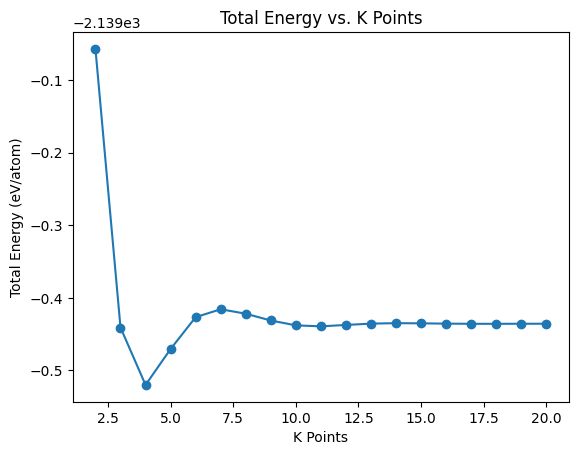

In [ ]:
for k_point in k_point_values:
  change_k_point_param(k_point)
  ! /content/qe-lite/bin/pw.x < doped_graphene.scf.in > graphene.scf.out
  output = ase.io.read("graphene.scf.out")
  k_point_total_energies.append(output.get_total_energy())
  print(f"Successfully read energy: {output.get_total_energy()}")

plt.plot(k_point_values, k_point_total_energies, 'o-')
plt.xlabel('K Points')
plt.ylabel('Total Energy (eV/atom)')
plt.title('Total Energy vs. K Points')
plt.show()

## PLOTTING VACUUM SIZE SPACE AGAINST TOTAL ENERGY (Lattice Parameter C)



In [ ]:
!cat doped_graphene.scf.in


&CONTROL
  calculation = 'scf'
  restart_mode = 'from_scratch'
  pseudo_dir= '/content/qe-lite/pseudopotentials'
  prefix = 'graphene'
/
&SYSTEM
  ibrav = 0
  nat = 8
  ntyp = 2
  occupations = 'smearing'
  smearing = 'mv'
  degauss = 0.02
  ecutwfc = 120
/
&ELECTRONS
  mixing_beta = 0.3
  conv_thr = 1.0d-8
/
ATOMIC_SPECIES
C 12.01017 C.upf
N 14.00670 N.upf

ATOMIC_POSITIONS (crystal)
N 0.00000  0.00000  0.0
C 0.33333  0.66667  0.0
C 0.50000  0.00000  0.0
C 0.83333  0.66667  0.0
C 0.00000  0.50000  0.0
C 0.33333  0.16667  0.0
C 0.50000  0.50000  0.0
C 0.83333  0.16667  0.0


CELL_PARAMETERS angstrom
  4.920   0.000   0.000
 -2.460   4.260   0.000
  0.000   0.000  15.000

K_POINTS (automatic)
20 20 1 0 0 0


In [ ]:
c_values = [2.00, 3.00, 4.00, 5.00, 6.00, 7.00, 8.00, 9.00, 10.00, 11.00, 12.00, 13.00, 14.00, 15.00, 16.00, 17.00, 18.00, 19.00, 20.00]
c_values_total_energies = []

In [ ]:
def change_vacuum_value(c):
    global qe_input

    # Use regex to replace only the third line of CELL_PARAMETERS
    qe_input = re.sub(
        r"(CELL_PARAMETERS\s+angstrom\s+[\s\S]*?\n[\s\S]*?\n)[\s\S]*?\n",
        rf"\1  0.00   0.00   {c:.2f}\n",
        qe_input
    )

    with open("doped_graphene.scf.in", "w") as f:
        f.write(qe_input)

    # Confirm what was written
    output = !grep -A 3 CELL_PARAMETERS doped_graphene.scf.in
    print("Updated CELL_PARAMETERS:")
    for line in output:
        print(line)


In [ ]:
change_vacuum_value(3.00)
!cat doped_graphene.scf.in

Updated CELL_PARAMETERS:
CELL_PARAMETERS angstrom
  4.920   0.000   0.000
 -2.460   4.260   0.000
  0.00   0.00   3.00

&CONTROL
  calculation = 'scf'
  restart_mode = 'from_scratch'
  pseudo_dir= '/content/qe-lite/pseudopotentials'
  prefix = 'graphene'
/
&SYSTEM
  ibrav = 0
  nat = 8
  ntyp = 2
  occupations = 'smearing'
  smearing = 'mv'
  degauss = 0.02
  ecutwfc = 120
/
&ELECTRONS
  mixing_beta = 0.3
  conv_thr = 1.0d-8
/
ATOMIC_SPECIES
C 12.01017 C.upf
N 14.00670 N.upf

ATOMIC_POSITIONS (crystal)
N 0.00000  0.00000  0.0
C 0.33333  0.66667  0.0
C 0.50000  0.00000  0.0
C 0.83333  0.66667  0.0
C 0.00000  0.50000  0.0
C 0.33333  0.16667  0.0
C 0.50000  0.50000  0.0
C 0.83333  0.16667  0.0


CELL_PARAMETERS angstrom
  4.920   0.000   0.000
 -2.460   4.260   0.000
  0.00   0.00   3.00

K_POINTS (automatic)
20 20 1 0 0 0


In [ ]:
for c in c_values:
  change_vacuum_value(c)
  ! /content/qe-lite/bin/pw.x < doped_graphene.scf.in > graphene.scf.out
  output = ase.io.read("graphene.scf.out")
  c_values_total_energies.append(output.get_total_energy())
  print(f"Successfully read energy: {output.get_total_energy()}")
  print(f"Successfully read lattice parameter: {c}")

plt.plot(c_values, c_values_total_energies, 'o-')
plt.xlabel('C')
plt.ylabel('Total Energy (eV/atom)')
plt.title('Total Energy vs. C')
plt.show()


Updated CELL_PARAMETERS:
CELL_PARAMETERS angstrom
  4.920   0.000   0.000
 -2.460   4.260   0.000
  0.00   0.00   2.00
Successfully read energy: -2105.1981992330852
Successfully read lattice parameter: 2.0
Updated CELL_PARAMETERS:
CELL_PARAMETERS angstrom
  4.920   0.000   0.000
 -2.460   4.260   0.000
  0.00   0.00   3.00
Successfully read energy: -2129.7824571861534
Successfully read lattice parameter: 3.0
Updated CELL_PARAMETERS:
CELL_PARAMETERS angstrom
  4.920   0.000   0.000
 -2.460   4.260   0.000
  0.00   0.00   4.00
Successfully read energy: -2137.3055518841547
Successfully read lattice parameter: 4.0
Updated CELL_PARAMETERS:
CELL_PARAMETERS angstrom
  4.920   0.000   0.000
 -2.460   4.260   0.000
  0.00   0.00   5.00
Successfully read energy: -2139.0230462688655
Successfully read lattice parameter: 5.0
Updated CELL_PARAMETERS:
CELL_PARAMETERS angstrom
  4.920   0.000   0.000
 -2.460   4.260   0.000
  0.00   0.00   6.00
Successfully read energy: -2139.3607094740582
Successfull

StopIteration: 

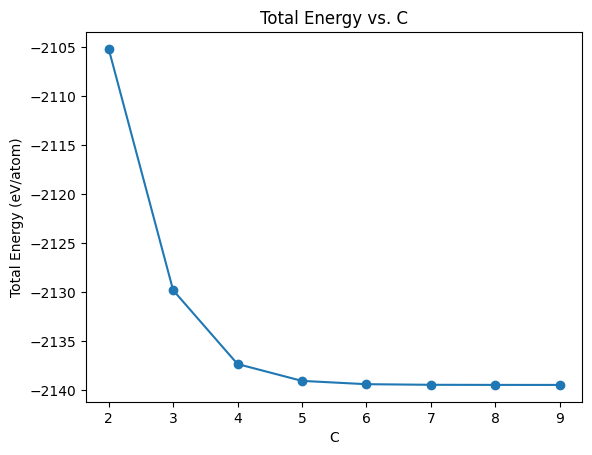

In [ ]:
plt.plot(c_values[:len(c_values_total_energies)], c_values_total_energies, 'o-')
plt.xlabel('C')
plt.ylabel('Total Energy (eV/atom)')
plt.title('Total Energy vs. C')
plt.show()

## COMBINING ALL GRAPHS INTO ONE FIGURE

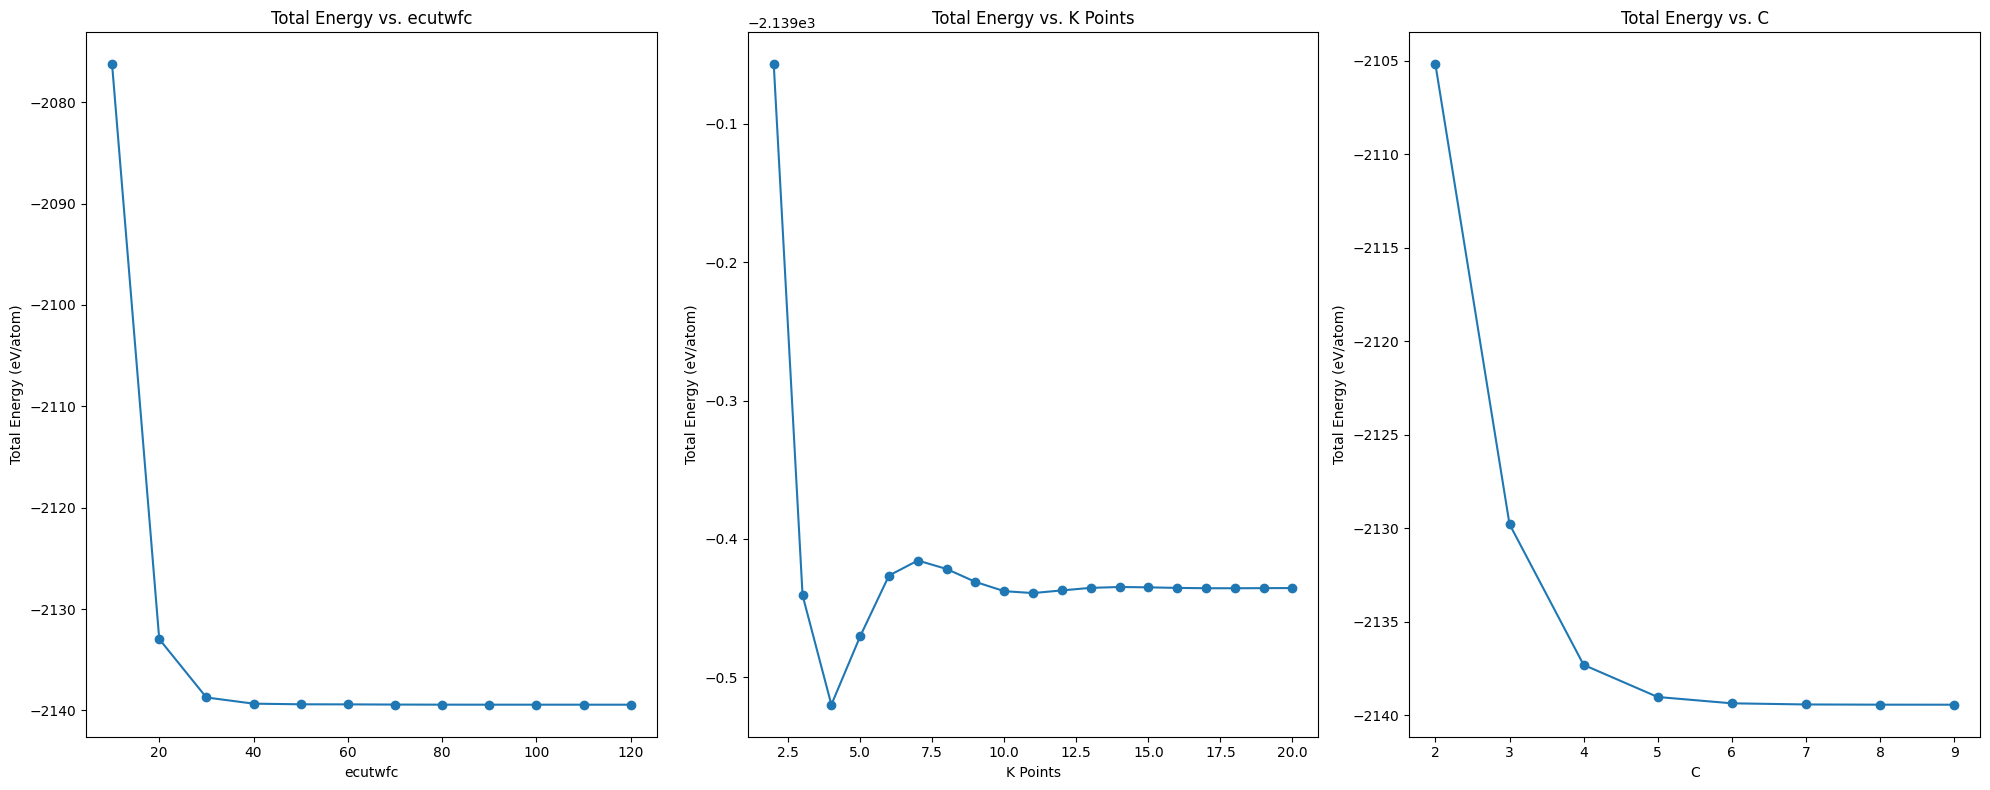

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.plot(ecutwfc_values, ecutoff_total_energies, 'o-')
plt.xlabel('ecutwfc')
plt.ylabel('Total Energy (eV/atom)')
plt.title('Total Energy vs. ecutwfc')

plt.subplot(1, 3, 2)
plt.plot(k_point_values, k_point_total_energies, 'o-')
plt.xlabel('K Points')
plt.ylabel('Total Energy (eV/atom)')
plt.title('Total Energy vs. K Points')

plt.subplot(1, 3, 3)
plt.plot(c_values[:len(c_values_total_energies)], c_values_total_energies, 'o-')
plt.xlabel('C')
plt.ylabel('Total Energy (eV/atom)')
plt.title('Total Energy vs. C')

plt.tight_layout()
plt.show()